# Avaliação Final

NOME: 


E-MAIL: 

Esta é a A.F. de Álgebra Linear e Teoria da Informação de 2s2023.

INSTRUÇÕES:

1. Faça todas as questões
1. Salve o notebook
1. Envie o notebook salvo no Blackboard

IMPORTANTE:

* Você pode consultar qualquer material ou IA, mas não qualquer colega ou pessoa humana, presente ou não na prova.
* Não é permitida a utilização de geradores de texto, como o GPT-3. É permitida somente a utilização do copilot.
* O envio da prova será fechado às 11h45. Aqueles que não enviarem o material até este horário ficarão com zero.
* A prova vale um total de 10 pontos. Cada questão vale 2.5 pontos.
* Os conceitos F, E, D, C, B, A serão mapeados para 0, 2, 4, 6, 8 e 10.
* Para todas as questões, usaremos a rubrica que segue anexa a esta prova. Há uma rubrica para a justificativa e uma rubrica para o código. A nota da questão é a menor entre as notas da justificativa e do código.


# Exercício 1

A matriz $X$ é:

$$
X = \begin{bmatrix} 0.95 & -0.75 \\ 0.25 & -0.05 \end{bmatrix}
$$

Um auto-vetor de X é:
$$
v = \begin{bmatrix} 3 \\ 1 \end{bmatrix}
$$

Quais dentre os valores abaixo seriam auto-valores de $X$ em par com o auto-vetor $v$? Justifique sua resposta.

[ ] 0.2

[ ] 0.31

[X] 0.7

[ ] 0.7071

[ ] 0.94

[ ] 1

[ ] 2.1

[ ] 3

In [31]:
import numpy as np

X = np.array([[0.95, -0.75], 
              [0.25, -0.05]])


print("X")
print(X)
print("")

v, w = np.linalg.eig(X) # v = eigenvalues, w = eigenvectors
print("v")
print(v)
print("")
print("w")
print(w)
print("")

V = np.array([3, 1]).T

print("X @ V")
print(X @ V)

def verifica_se_eh_autovetor(X, V):
    mult = X @ V
    # Se o vetor for um autovetor, deve ter um lambda tal que X @ V = lambda * V
    alpha = 0.0001
    while True:
        if np.allclose(mult, alpha * V):
            print("Autovetor encontrado com lambda = ", alpha)
            return alpha
        alpha += 0.0001
        if alpha > 10:
            print("Não é autovetor")
            return None

print(verifica_se_eh_autovetor(X, V))

X
[[ 0.95 -0.75]
 [ 0.25 -0.05]]

v
[0.7 0.2]

w
[[0.9486833  0.70710678]
 [0.31622777 0.70710678]]

X @ V
[2.1 0.7]
Autovetor encontrado com lambda =  0.6999999999999392
0.6999999999999392


$$
\begin{bmatrix} 0.95 & -0.75 \\ 0.25 & -0.05 \end{bmatrix} \begin{bmatrix} 3 \\ 1 \end{bmatrix} = \lambda \begin{bmatrix} 3 \\ 1 \end{bmatrix} = \begin{bmatrix} 2.1 \\ 0.7 \end{bmatrix}
$$

# Exercício 2

Você recebeu a importante tarefa de analisar um conjunto de dados contendo informações de uma famosa série animada japonesa. Por ser expecialista em Álgebra Linear, você decidiu aplicar a projeção PCA para reduzir a dimensionalidade dos dados. Assim, utilize o conjunto de dados fornecido com a prova (retirado [daqui](https://www.kaggle.com/datasets/dinishsubaramaniam/op-episodes-and-arcs/)), aplique a projeção PCA nele e decida qual o número de dimensões que você usaria para representar os dados. Justifique sua resposta.

In [50]:
from sklearn.decomposition import PCA
import pandas as pd

df = pd.read_csv('one piece arcs.csv').select_dtypes(['number'])
numeric_columns = df.to_numpy()

# Normalizar os dados
df_normalized = (df - df.mean()) / df.std()

# Aplicar a PCA
pca = PCA()
pca.fit(df_normalized)

# Analisar a variância explicada
explained_variance_ratio = pca.explained_variance_ratio_
print("Variância explicada por cada componente:", explained_variance_ratio)

# componentes = pca.components_
# print("Componentes principais:")
# print(componentes)

# Calcular a proporção acumulada da variância explicada
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()

# Encontrar o número de componentes principais para explicar, por exemplo, 90% da variância
n_components_90 = (cumulative_explained_variance_ratio < 0.90).sum() + 1

print("Número de componentes para explicar 90% da variância:", n_components_90)

Variância explicada por cada componente: [8.29668590e-01 1.26624205e-01 3.22212282e-02 1.14854067e-02
 4.90698837e-07 7.94306742e-08]
Número de componentes para explicar 90% da variância: 2


# Exercício 3

Um grupo de estudos do meio ambiente no planeta de Kabum Prime possui um balão meteorológico que coleta diversos dados sobre a atmosfera.

Foi desenvolvido um novo sensor e os cientistas estão analisando se devem incorporar ele ao balão.

O sensor atual suporta uma temperatura de -50 graus Celsius.

O novo sensor suporta uma temperatura de -70 graus Celsius.

O grupo de estudos mediu a temperatura da atmosfera em diversos pontos e obteve os dados apresentados abaixo.

Utilizando o método de descida pelo gradiente com um modelo linear do tipo $y=ax+b$ responda: Qual a altura máxima aproximada que o balão pode atingir com o novo sensor?

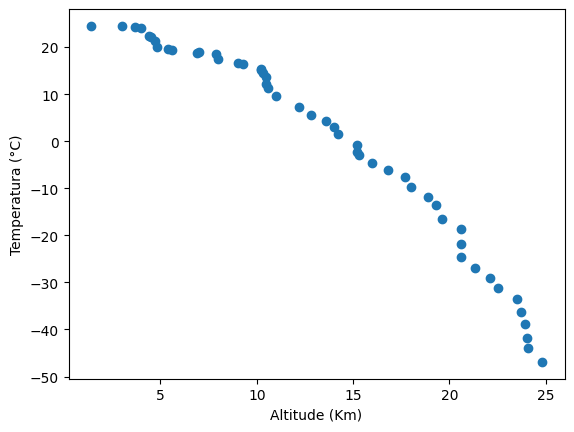

In [33]:
import matplotlib.pyplot as plt
import random

altura = np.array([1.4, 3.0, 3.7, 4.0, 4.4, 4.5, 4.7, 4.8, 5.4, 5.6, 6.9, 7.0, 7.9, 8.0, 9.0, 9.3, 10.2, 10.2, 10.3, 10.5, 10.5, 10.6, 11.0, 12.2, 12.8, 13.6, 14.0, 14.2, 15.2, 15.2, 15.3, 16.0, 16.8, 17.7, 18.0, 18.9, 19.3, 19.6, 20.6, 20.6, 20.6, 21.3, 22.1, 22.5, 23.5, 23.7, 23.9, 24.0, 24.1, 24.8])
temperatura = np.array([24.5, 24.5, 24.3, 24.0, 22.3, 22.1, 21.2, 20.1, 19.6, 19.3, 18.8, 19.0, 18.5, 17.4, 16.6, 16.4, 15.4, 15.1, 14.5, 13.7, 12.2, 11.3, 9.7, 7.2, 5.5, 4.3, 3.1, 1.5, -0.7, -2.3, -2.9, -4.6, -6.1, -7.5, -9.7, -11.9, -13.6, -16.5, -18.7, -21.8, -24.5, -26.9, -29.0, -31.1, -33.6, -36.2, -38.9, -41.8, -44.0, -46.9])

plt.figure()
plt.scatter(altura,temperatura)
plt.xlabel('Altitude (Km)')
plt.ylabel('Temperatura (°C)')
plt.show()

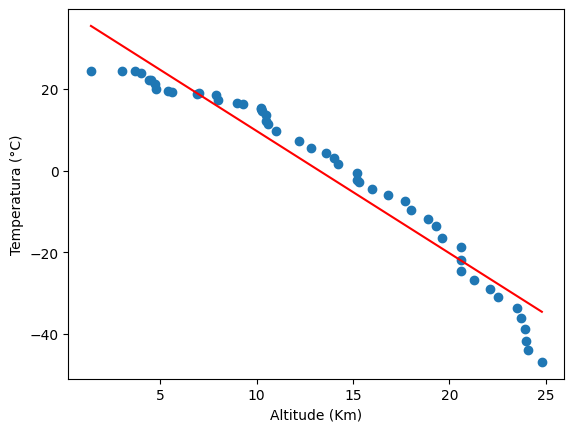

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as np_
from autograd import grad

altura = np.array([1.4, 3.0, 3.7, 4.0, 4.4, 4.5, 4.7, 4.8, 5.4, 5.6, 6.9, 7.0, 7.9, 8.0, 9.0, 9.3, 10.2, 10.2, 10.3, 10.5, 10.5, 10.6, 11.0, 12.2, 12.8, 13.6, 14.0, 14.2, 15.2, 15.2, 15.3, 16.0, 16.8, 17.7, 18.0, 18.9, 19.3, 19.6, 20.6, 20.6, 20.6, 21.3, 22.1, 22.5, 23.5, 23.7, 23.9, 24.0, 24.1, 24.8])
temperatura = np.array([24.5, 24.5, 24.3, 24.0, 22.3, 22.1, 21.2, 20.1, 19.6, 19.3, 18.8, 19.0, 18.5, 17.4, 16.6, 16.4, 15.4, 15.1, 14.5, 13.7, 12.2, 11.3, 9.7, 7.2, 5.5, 4.3, 3.1, 1.5, -0.7, -2.3, -2.9, -4.6, -6.1, -7.5, -9.7, -11.9, -13.6, -16.5, -18.7, -21.8, -24.5, -26.9, -29.0, -31.1, -33.6, -36.2, -38.9, -41.8, -44.0, -46.9])

altura_ = np_.array(altura)
temperatura_ = np_.array(temperatura)

def loss ( parameters ):
    A, B, altura, temperatura = parameters
    estimativa = A*altura + B
    erro = np_.mean((estimativa - temperatura)**2)
    return erro

dloss = grad(loss)


A = 0.0
B = 0.0
alpha = 10**-3


for i in range(10000):
    g = dloss( (A,B,altura_,temperatura_) )
    A -= alpha * g[0]
    B -= alpha * g[1]

funcao_feita_por_mim = A*altura_ + B

plt.figure()
plt.scatter(altura,temperatura)
plt.plot(altura,funcao_feita_por_mim, color='red')
plt.xlabel('Altitude (Km)')
plt.ylabel('Temperatura (°C)')
plt.show()

In [40]:
# Descobrir qual é a altura que pode chegar com -70°C

def funcao_inversa(temperatura, A, B):
    return (temperatura - B) / A

print(funcao_inversa(-70, A, B))

# Descobrir qual é a temperatura que pode chegar com 30km de altura

print(A*36.6 + B)

36.617347247846446
-69.9480550595578


# Exercício 4

1. Apresente a árvore de Huffman para a palavra `COELHO`.
1. Qual é a codificação da palavra `COELHO` na árvore apresentada?
1. Qual é o limite inferior para o número de bits que devem ser usados para representar essa palavra?

In [35]:
import numpy as np
import scipy.stats as stats
palavra = "COELHO"
probs = np.array(  [palavra.count(w) for w in set(palavra)])/len(palavra)
E = stats.entropy(probs, base=2)
E*len(palavra)

13.509775004326938